 
Code importing essential libraries

In [174]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array



Sets dataset paths for the training and test data directories.

In [176]:

train_path = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/train/train'

test_path = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/test/test'
# Define dataset categories and sub-categories
categories = {
    "upperwear": ["Shirt", "T-shirt", "Jacket"],
    "bottomwear": ["Pants", "Skirt", "Shorts"],
    "footwear": ["Shoes", "Sneakers", "Heels", "Flats"],
    "one-piece": ["Dress"],
    "accessories": ["Hats", "Bags"]
}


# Function to check image formats and print unsupported files
def check_image_formats(base_path):
    supported_formats = ['.jpg', '.jpeg', '.png']
    print(f"Checking image formats in {base_path}...")
    for root, _, files in os.walk(base_path):
        for file in files:
            if not any(file.lower().endswith(ext) for ext in supported_formats):
                print(f"Unsupported format: {os.path.join(root, file)}")

# Function to check if dataset structure matches defined categories
def validate_dataset_structure(base_path, category_structure):
    print(f"Validating dataset structure in {base_path}...")
    # List the top-level folders in the dataset
    dataset_classes = [cls.lower() for cls in os.listdir(base_path)]
    
    for category in category_structure.keys():
        if category.lower() not in dataset_classes:
            print(f"Missing category: {category}")
        else:
            print(f"Category exists: {category}")
            # Skipping subcategory validation since images are stored directly in the main category folder


# Run the checks on training and validation data
check_image_formats(train_path)
check_image_formats(test_path)

validate_dataset_structure(train_path, categories)
validate_dataset_structure(test_path, categories)

# Print the classes in training and validation datasets
print("Training classes:", os.listdir(train_path))
print("Test classes:", os.listdir(test_path))


Checking image formats in D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/train/train...
Checking image formats in D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/test/test...
Validating dataset structure in D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/train/train...
Category exists: upperwear
Category exists: bottomwear
Category exists: footwear
Category exists: one-piece
Category exists: accessories
Validating dataset structure in D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/test/test...
Category exists: upperwear
Category exists: bottomwear
Category exists: footwear
Category exists: one-piece
Category exists: accessories
Training classes: ['accessories', 'bottomwear', 'footwear', 'one-piece', 'upperwear']
Test classes: ['accessories', 'bottomwear', 'footwear', 'one-piece', 'upperwear']



Defines categories and subcategories for outfits (e.g., "Upperwear", "Bottomwear").

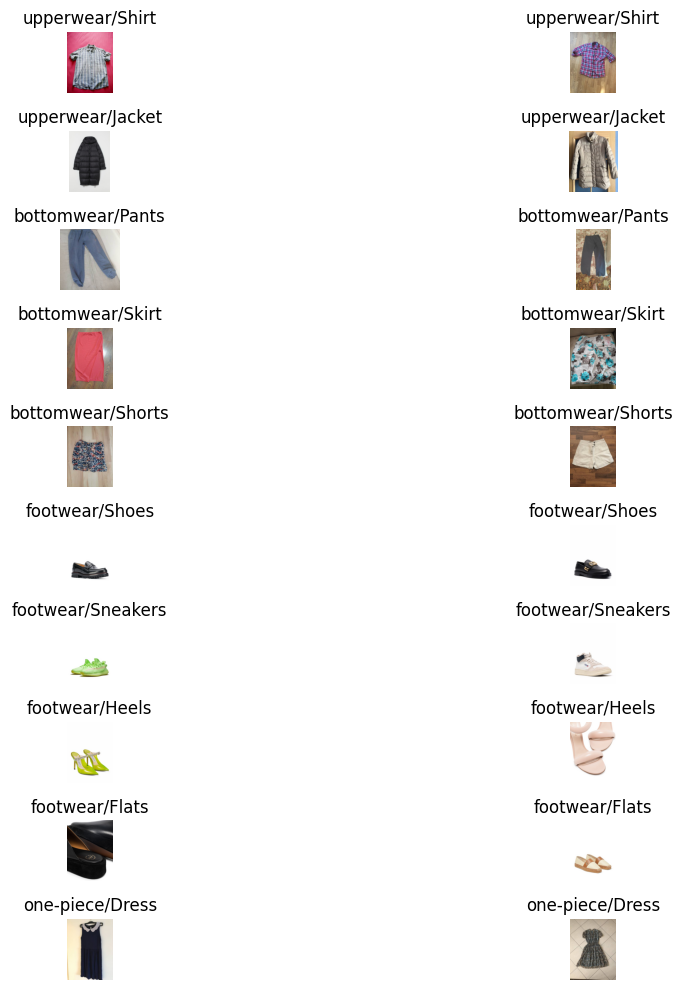

Processed subcategories:
  upperwear/Shirt
  upperwear/Jacket
  bottomwear/Pants
  bottomwear/Skirt
  bottomwear/Shorts
  footwear/Shoes
  footwear/Sneakers
  footwear/Heels
  footwear/Flats
  one-piece/Dress


In [177]:
# List to store images for each subcategory
image_samples = {}

# Traverse each category and subcategory
for category, subcategories in categories.items():
    category_path = os.path.join(train_path, category.lower())  # Adjust for lowercase folder names
    if os.path.exists(category_path):
        for subcategory in subcategories:
            subcategory_path = os.path.join(category_path, subcategory)
            if os.path.exists(subcategory_path):
                # Collect image paths from the folder
                files = [
                    os.path.join(subcategory_path, f)
                    for f in os.listdir(subcategory_path)
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))  # Check for valid image formats
                ]
                if files:
                    # Store one or two images from the subcategory
                    image_samples[f"{category}/{subcategory}"] = files[:2]
            else:
                # If the folder exists but is empty, skip it without printing
                pass

# Display one or two images from each subcategory
plt.figure(figsize=(15, 10))
index = 1
for subcategory, samples in image_samples.items():
    for img_path in samples:
        try:
            img = Image.open(img_path)
            plt.subplot(len(image_samples), 2, index)
            plt.imshow(img)
            plt.axis('off')
            plt.title(subcategory)
            index += 1
        except Exception as e:
            print(f"Error displaying image: {img_path}. Error: {e}")
plt.tight_layout()
plt.show()

# Print summary of processed folders and missing ones
print("Processed subcategories:")
for subcategory in image_samples:
    print(f"  {subcategory}")


 Sets the dataset path for body shape data and verifies file existence.

In [178]:
# Paths to the datasets

body_shape_data_path = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Images_Blurred'  


In [179]:
# Load the CSV file
df = pd.read_csv('D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/updated_measurements_with_labels.csv')

# Print the first few rows to understand the structure of the dataset
print(df.head())


  filename  front_bust  front_waist  front_hips  height_cm            label
0    1.png          41           40          40        188  Rectangle Shape
1    2.png          38           40          44        185  Rectangle Shape
2    3.png          32           37          36        183      Apple Shape
3    4.png          38           40          40        180  Rectangle Shape
4    5.png          38           30          38        188  Hourglass Shape



Lists and counts all image files in the body shape dataset directory.

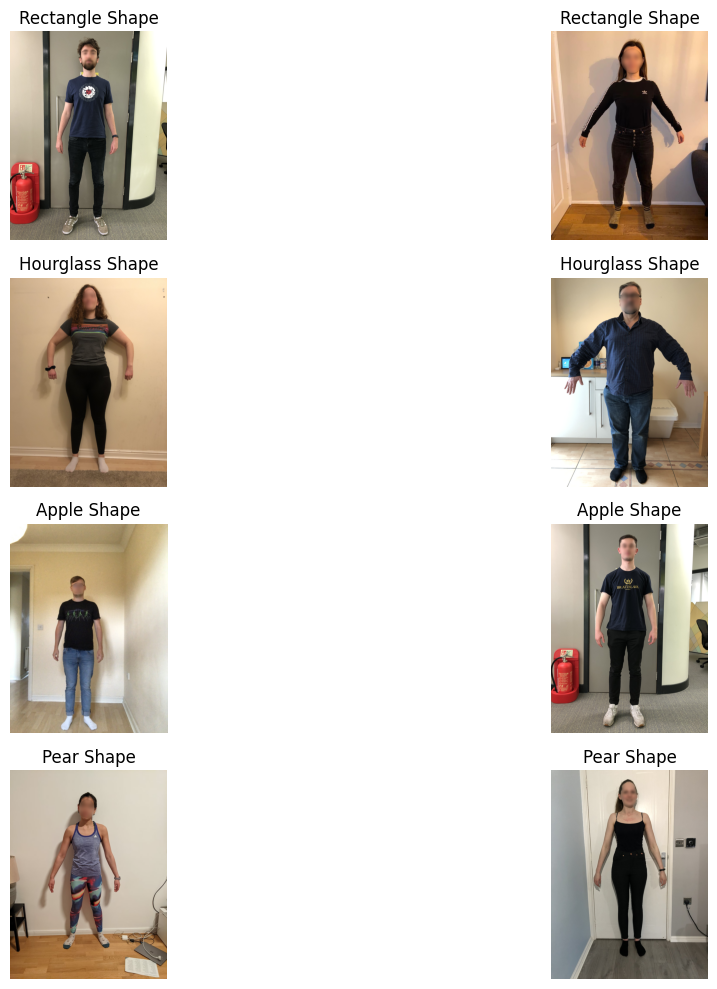

Processed labels (categories):
  Rectangle Shape
  Hourglass Shape
  Apple Shape
  Pear Shape


In [181]:
import os
from PIL import Image
import matplotlib.pyplot as plt



# List to store image samples for each label
image_samples = {}

# List of labels in your dataset (adjust if different labels exist)
labels = ['Rectangle Shape', 'Hourglass Shape', 'Apple Shape', 'Pear Shape']

# Traverse each label (class) folder
for label in labels:
    label_path = os.path.join(body_shape_data_path, label)  # Path to the subfolder of each label
    if os.path.exists(label_path):  # Check if the label folder exists
        # Collect image paths from the folder
        files = [
            os.path.join(label_path, f)
            for f in os.listdir(label_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))  # Check for valid image formats
        ]
        if files:
            # Store one or two images from the subcategory
            image_samples[label] = files[:2]  # Store only 2 images from each class folder
    else:
        print(f"Folder for label '{label}' not found. Skipping...")

# Display one or two images from each label
plt.figure(figsize=(15, 10))
index = 1
for label, samples in image_samples.items():
    for img_path in samples:
        try:
            img = Image.open(img_path)
            plt.subplot(len(image_samples), 2, index)
            plt.imshow(img)
            plt.axis('off')
            plt.title(label)
            index += 1
        except Exception as e:
            print(f"Error displaying image: {img_path}. Error: {e}")

plt.tight_layout()
plt.show()

# Print summary of processed folders and missing ones
print("Processed labels (categories):")
for label in image_samples:
    print(f"  {label}")





Displays training and validation dataset sizes.

In [183]:

print("Fashion Dataset: Training Set Size:", len(os.listdir(train_path)), 
      "Validation Set Size:", len(os.listdir(test_path)))


Fashion Dataset: Training Set Size: 5 Validation Set Size: 5


 
Code for loading and resizing images with TensorFlow's

In [185]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

def load_and_preprocess_images(dataset_folder, target_size=(128, 128)):
    images = []
    labels = []

    # Define categories and sub-categories
    categories = {
        "Upperwear": ["Shirt", "T-shirt", "Jacket"],
        "Bottomwear": ["Pants", "Skirt", "Shorts"],
        "Footwear": ["Shoes", "Sneakers", "Heels", "Flats"],
        "One-piece": ["Dress"],
        "Accessories": ["Hats", "Bags"]
    }

    # Navigate through the dataset
    for category, subcategories in categories.items():
        category_path = os.path.join(dataset_folder, category)
        for subcategory in subcategories:
            subcategory_path = os.path.join(category_path, subcategory)
            if os.path.isdir(subcategory_path):
                for img_file in os.listdir(subcategory_path):
                    img_path = os.path.join(subcategory_path, img_file)
                    try:
                        # Load and preprocess the image
                        img = load_img(img_path, target_size=target_size)
                        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
                        images.append(img_array)
                        labels.append(f"{category}/{subcategory}")
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
            else:
                print(f"Sub-category folder not found: {subcategory_path}")

    return np.array(images), np.array(labels)



Function to encode labels into numerical values using a mapping.

In [187]:
import numpy as np

def encode_labels(labels):
    # Get unique labels sorted alphabetically
    unique_labels = sorted(set(labels))
    
    # Create a mapping from label to integer
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    
    # Encode each label using the mapping
    encoded_labels = np.array([label_map[label] for label in labels])
    
    return encoded_labels, label_map

# Sample labels
labels = [
    "Upperwear/Shirt", 
    "Upperwear/T-shirt", 
    "Footwear/Sneakers", 
    "Footwear/Shoes", 
    "Accessories/Hats"
]

# Encode labels
encoded_labels, label_map = encode_labels(labels)

# Display results
print("Encoded Labels:", encoded_labels)
print("Label Mapping:", label_map)



Encoded Labels: [3 4 2 1 0]
Label Mapping: {'Accessories/Hats': 0, 'Footwear/Shoes': 1, 'Footwear/Sneakers': 2, 'Upperwear/Shirt': 3, 'Upperwear/T-shirt': 4}


 
Loads and preprocesses the body shape dataset from a CSV file.

In [188]:
# Function to encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    label_map = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    return encoded_labels, label_map

# Load and preprocess body shape dataset
body_shape_df = pd.read_csv('D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/updated_measurements_with_labels.csv')

# Clean the labels to remove any leading/trailing whitespaces
body_shape_df['label'] = body_shape_df['label'].str.strip()

# Print unique labels to verify all are present
print("Unique labels in the dataset:", body_shape_df['label'].unique())



# Encode labels (including all unique labels such as "Hourglass Shape")
body_shape_encoded_labels, body_shape_label_map = encode_labels(body_shape_labels)

# Print the encoded labels and their corresponding mapping
print("Encoded Labels:", body_shape_encoded_labels)
print("Label Map:", body_shape_label_map)



Unique labels in the dataset: ['Rectangle Shape' 'Apple Shape' 'Hourglass Shape' 'Pear Shape']
Encoded Labels: [3 3 0 3 1 3 2 3 0 3 2 2 1 3 3 2 1 0 2 2 1]
Label Map: {'Apple Shape': 0, 'Hourglass Shape': 1, 'Pear Shape': 2, 'Rectangle Shape': 3}



Example function for loading and preprocessing images, including error handling

In [190]:
# Example preprocessing function with path validation
def load_and_preprocess_images(image_folder, target_size=(128, 128)):
    if not os.path.exists(image_folder):
        raise FileNotFoundError(f"Path does not exist: {image_folder}")
    
    images = []
    labels = []

    
    # Loop through all directories or files in the folder
    for label in os.listdir(image_folder):
        label_path = os.path.join(image_folder, label)
        if os.path.isdir(label_path):  # Ensure it's a directory
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
        else:
            print(f"Skipping {label_path} as it is not a directory.")
    return np.array(images), np.array(labels)


# Augmentation in body shape dataset

In [242]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd

# Path where the original body shape images are stored, organized by labels in subdirectories
body_shape_data_path = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Images_Blurred'

# Load the CSV with image filenames and labels
body_shape_df = pd.read_csv('D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/updated_measurements_with_labels.csv')

# Ensure the column names are correct and print the first few rows
print(body_shape_df.head())

# Initialize lists to store images and labels
body_shape_images = []
body_shape_labels = body_shape_df['label'].values  # Ensure this is the correct column name for labels

# Load and preprocess the images
for img_file, label in zip(body_shape_df['filename'], body_shape_labels):
    img_path = os.path.join(body_shape_data_path, label, img_file)  # Adjusted to find images in subfolders by label
    print(f"Loading image: {img_path}")  # Print the path to check

    try:
        # Check if the file exists before loading it
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(128, 128))  # Resize to desired shape
            img_array = img_to_array(img) / 255.0  # Normalize the image
            body_shape_images.append(img_array)
        else:
            print(f"Image {img_file} not found at {img_path}")
    except Exception as e:
        print(f"Error loading image {img_file}: {e}")

# Convert the images list to a NumPy array
if body_shape_images:
    body_shape_images = np.array(body_shape_images)
else:
    print("No images were loaded.")
    body_shape_images = np.array([])  # Set to an empty array to avoid further errors

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale image values to [0, 1]
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random width shift
    height_shift_range=0.2,  # Random height shift
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Set a fixed target number of images per class (e.g., 1000 augmented images per class)
target_images_per_class = 1000

# Augment the images and save them to the augmented_images_dir
augmented_images_dir = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Augmentation images'
os.makedirs(augmented_images_dir, exist_ok=True)

# Initialize a counter for the number of generated images
image_counter = 0

# Augment the images for each class until we have target_images_per_class for each
for label in body_shape_df['label'].unique():
    # Create a directory for each label if it doesn't exist
    label_dir = os.path.join(augmented_images_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Get the indices of images belonging to the current label
    label_indices = np.where(body_shape_labels == label)[0]

    # Calculate how many more images need to be generated for the current label
    current_image_count = len(label_indices)
    images_to_generate = target_images_per_class - current_image_count

    # Generate augmented images for the current label
    for idx in label_indices:
        # Create an image batch (1 image at a time)
        image = body_shape_images[idx].reshape((1,) + body_shape_images[idx].shape)

        # Generate augmented images and save them
        for _ in datagen.flow(image, batch_size=1, save_to_dir=label_dir, save_prefix=f"aug_{idx}", save_format='png'):
            image_counter += 1
            if image_counter >= target_images_per_class * len(body_shape_df['label'].unique()):
                break

    print(f"Augmented images for {label} class: {images_to_generate} images generated.")

print(f"Augmented dataset created with {image_counter} new images.")


  filename  front_bust  front_waist  front_hips  height_cm            label
0    1.png          41           40          40        188  Rectangle Shape
1    2.png          38           40          44        185  Rectangle Shape
2    3.png          32           37          36        183      Apple Shape
3    4.png          38           40          40        180  Rectangle Shape
4    5.png          38           30          38        188  Hourglass Shape
Loading image: D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Images_Blurred\Rectangle Shape\1.png
Loading image: D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Images_Blurred\Rectangle Shape\2.png
Loading image: D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Images_Blurred\Apple Shape\3.png
Loading image: D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/I


Sets up an ImageDataGenerator for data augmentation and preprocessing.

In [243]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for the real and augmented images with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale image values to [0, 1]
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random width shift
    height_shift_range=0.2,  # Random height shift
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest',  # Fill missing pixels after transformations
    validation_split=0.2  # Set aside 20% of data for validation
)

# Specify the path to the combined dataset (real + augmented images)
train_path = 'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented'

# Load training images using the `flow_from_directory` method
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Resize images to (128, 128)
    batch_size=32,  # Set the batch size
    class_mode='categorical',  # Since it's a multi-class classification problem
    shuffle=True,  # Shuffle the dataset
    subset='training'  # Specify that this is the training data subset
)

# Load validation images using the `flow_from_directory` method
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Resize images to (128, 128)
    batch_size=32,  # Set the batch size
    class_mode='categorical',  # Since it's a multi-class classification problem
    shuffle=False,  # Don't shuffle the validation dataset
    subset='validation'  # Specify that this is the validation data subset
)


Found 9397 images belonging to 2 classes.
Found 2349 images belonging to 2 classes.



Train th body_shape model


In [252]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Number of classes
num_classes = 4

# Load pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all but the last few layers of the base model
for layer in base_model.layers[:-10]:  # Unfreeze the last 10 layers
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)  # Use GAP instead of Flatten
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(num_classes, activation='softmax')(x)  # Output layer

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Data augmentation for training and validation sets
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training data generator
train_generator = datagen.flow_from_directory(
    'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Augmentation images',  # Replace with your training data path
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/Human body Shape/real + augmented/Augmentation images',  # Replace with your validation data path
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]


class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))


# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # You can adjust this based on performance
    class_weight=class_weights,
    callbacks=callbacks
)

# Save the trained model
model.save("body_shape_resnet50_model.h5")


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_18[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 4,728,452 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

Found 11725 images belonging to 4 classes.
Found 11725 images belonging to 4 classes.


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.6378 - loss: 1.2785 - val_accuracy: 0.8488 - val_loss: 0.5173 - learning_rate: 1.0000e-04
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 653s 2s/step - accuracy: 0.7416 - loss: 1.0637 - val_accuracy: 0.7383 - val_loss: 0.7597 - learning_rate: 1.0000e-04
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - accuracy: 0.7804 - loss: 0.9325 - val_accuracy: 0.7455 - val_loss: 0.6758 - learning_rate: 1.0000e-04
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.7792 - loss: 0.8700 - val_accuracy: 0.8736 - val_loss: 0.3817 - learning_rate: 1.0000e-04
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.8263 - loss: 0.8123 - val_accuracy: 0.8414 - val_loss: 0.4929 - learning_rate: 1.0000e-04
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.8374 - loss: 0.6945 - val_accuracy: 0.8409 - val_loss: 0.5125 - learning_rate: 1.0000e-04
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accur

# Visualization of body_shape model

1. Plotting Accuracy and Loss

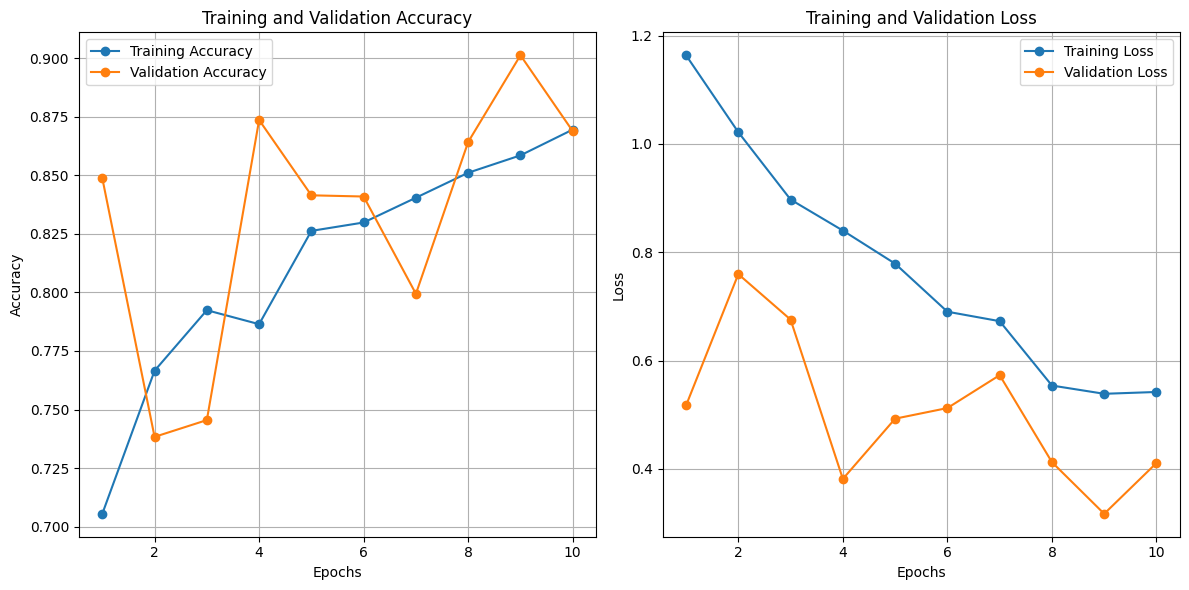

In [253]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2. Classification Report

366/366 ━━━━━━━━━━━━━━━━━━━━ 340s 919ms/step
Classification Report:
                  precision    recall  f1-score   support

    Apple Shape       0.02      0.06      0.03       260
Hourglass Shape       0.03      0.06      0.04       346
     Pear Shape       0.05      0.07      0.05       521
Rectangle Shape       0.90      0.83      0.86     10585

       accuracy                           0.75     11712
      macro avg       0.25      0.25      0.25     11712
   weighted avg       0.82      0.75      0.78     11712



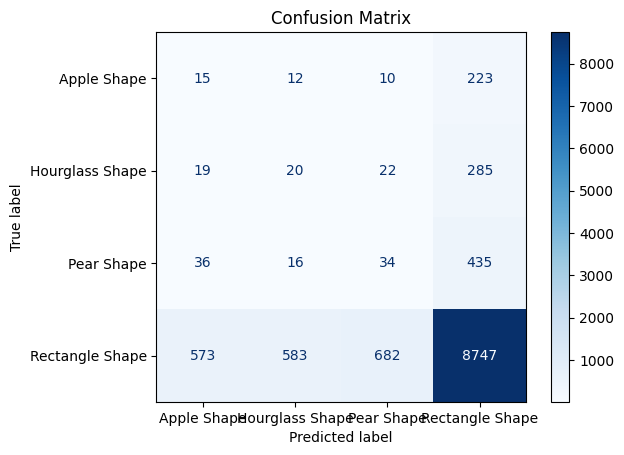

F1 Score: 0.78
Precision: 0.82
Recall: 0.75
Accuracy: 0.75


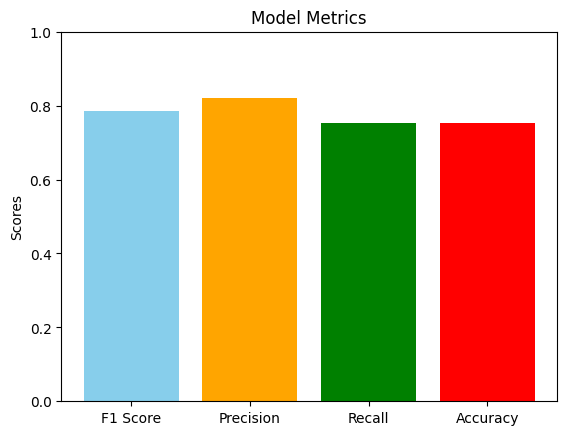

In [254]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score

# Predict on the validation data
validation_steps = validation_generator.samples // validation_generator.batch_size
y_pred_probs = model.predict(validation_generator, steps=validation_steps, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions
y_true = validation_generator.classes[:len(y_pred)]  # Get true labels

# Classification report
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Plot metrics
metrics = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
values = [f1, precision, recall, accuracy]

plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title("Model Metrics")
plt.ylabel("Scores")
plt.show()



3. ROC Curve

367/367 ━━━━━━━━━━━━━━━━━━━━ 308s 839ms/step


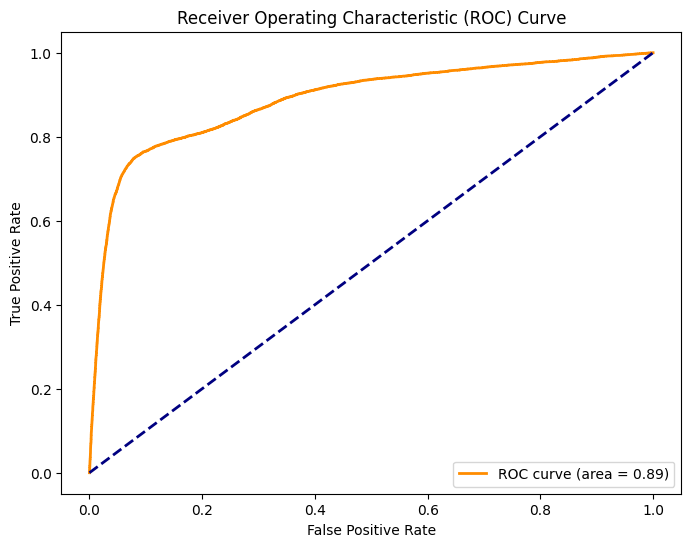

In [256]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Extract true labels from validation generator
y_true = validation_generator.classes  # True labels from the validation generator
class_indices = validation_generator.class_indices  # Class indices mapping

# Ensure labels are binarized for multi-class problems
y_true_bin = label_binarize(y_true, classes=list(class_indices.values()))

# Get predicted probabilities for each class
y_pred_prob = model.predict(validation_generator)

# Ensure shapes match
if y_true_bin.shape[0] != y_pred_prob.shape[0]:
    raise ValueError(f"Mismatch in samples: y_true_bin ({y_true_bin.shape[0]}) and y_pred_prob ({y_pred_prob.shape[0]})")

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Multi_label_outfit_recommendation_Model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

# Preprocessing datasets
outfit_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training dataset
outfit_train_gen = outfit_datagen.flow_from_directory(
    'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/train/train', 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode='categorical'  # Use binary if multi-label encoding is used
)

# Load test dataset
outfit_test_gen = outfit_datagen.flow_from_directory(
    'D:/UNIVERSITY/5th Semester/DLNN/DLNN Project/DS For project/outfit-items/test/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Dynamically determine the number of categories (multi-label)
num_categories = len(outfit_train_gen.class_indices)
print(f"Number of categories: {num_categories}")

# Model for multi-label outfit recommendation
outfit_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    
    Dense(num_categories, activation="sigmoid")  # Use sigmoid for multi-label output
])

# Compile the model
outfit_model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',  # Binary crossentropy for multi-label
    metrics=['accuracy']
)

# Train the model with validation
history = outfit_model.fit(
    outfit_train_gen,
    epochs=10,
    validation_data=outfit_test_gen  # Use test dataset for validation
)

# Save the model
outfit_model.save("multi_label_outfit_recommendation_model.h5")


Found 40139 images belonging to 5 classes.
Found 5011 images belonging to 5 classes.
Number of categories: 5


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 1358s 1s/step - accuracy: 0.7020 - loss: 0.3179 - val_accuracy: 0.9367 - val_loss: 0.0760
Epoch 2/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 1301s 1s/step - accuracy: 0.9105 - loss: 0.1040 - val_accuracy: 0.9471 - val_loss: 0.0614
Epoch 3/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 1083s 863ms/step - accuracy: 0.9383 - loss: 0.0731 - val_accuracy: 0.9559 - val_loss: 0.0488
Epoch 4/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 780s 622ms/step - accuracy: 0.9500 - loss: 0.0583 - val_accuracy: 0.9655 - val_loss: 0.0397
Epoch 5/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 823s 655ms/step - accuracy: 0.9598 - loss: 0.0473 - val_accuracy: 0.9637 - val_loss: 0.0445
Epoch 6/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 818s 652ms/step - accuracy: 0.9638 - loss: 0.0429 - val_accuracy: 0.9651 - val_loss: 0.0422
Epoch 7/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 816s 650ms/step - accuracy: 0.9684 - loss: 0.0388 - val_accuracy: 0.9659 - val_loss: 0.0411
Epoch 8/10
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 829s 661ms/step - accur

 
Visualizes training and validation metrics (accuracy and loss)


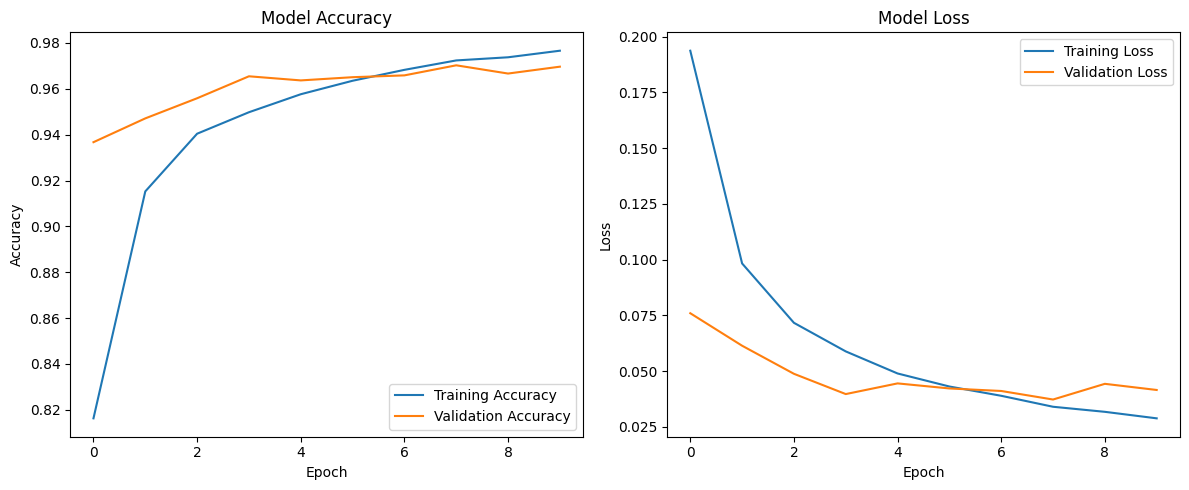

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Classification Report:

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on validation data
y_pred = outfit_model.predict(outfit_train_gen)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_true = outfit_train_gen.classes  # True class indices

# Class indices mapping
class_labels = list(outfit_train_gen.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


1255/1255 ━━━━━━━━━━━━━━━━━━━━ 824s 657ms/step
Classification Report:
              precision    recall  f1-score   support

 accessories       0.14      0.14      0.14      5309
  bottomwear       0.27      0.27      0.27     10582
    footwear       0.30      0.30      0.30     11948
   one-piece       0.08      0.08      0.08      2953
   upperwear       0.24      0.24      0.24      9347

    accuracy                           0.24     40139
   macro avg       0.20      0.20      0.20     40139
weighted avg       0.24      0.24      0.24     40139


Confusion Matrix:
[[ 732 1381 1580  389 1227]
 [1364 2816 3179  753 2470]
 [1611 3151 3552  876 2758]
 [ 397  786  868  237  665]
 [1181 2488 2759  692 2227]]
